# K Means Clustering (centroid based)

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from scipy.spatial.distance import cdist


sb.set() # set the default Seaborn style for graphics

In [2]:
#Drop non-float data
data = pd.read_csv('Dataset.csv')
data.drop("country", axis=1, inplace=True)
data.drop("Region", axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Employment: Industry (% of employed)                           302 non-null    float64
 1   Education: Primary gross enrol. ratio (female per 100 pop.)    302 non-null    float64
 2   Population age distribution (60+ years, %)                     302 non-null    float64
 3   Population age distribution (0-14 years, %)                    302 non-null    float64
 4   Pop. using improved sanitation facilities (rural, %)           302 non-null    float64
 5   Pop. using improved sanitation facilities (urban, %)           302 non-null    float64
 6   Pop. using improved drinking water (rural, %)                  302 non-null    float64
 7   Pop. using improved drinking water (urban, %)                 

### Scaling

In [3]:
#Scale all variables in dataset
scaler = MinMaxScaler()
for column in data:
    scaler.fit(data[[column]])
    data[column] = scaler.transform(data[[column]])

### Correleation

<AxesSubplot:>

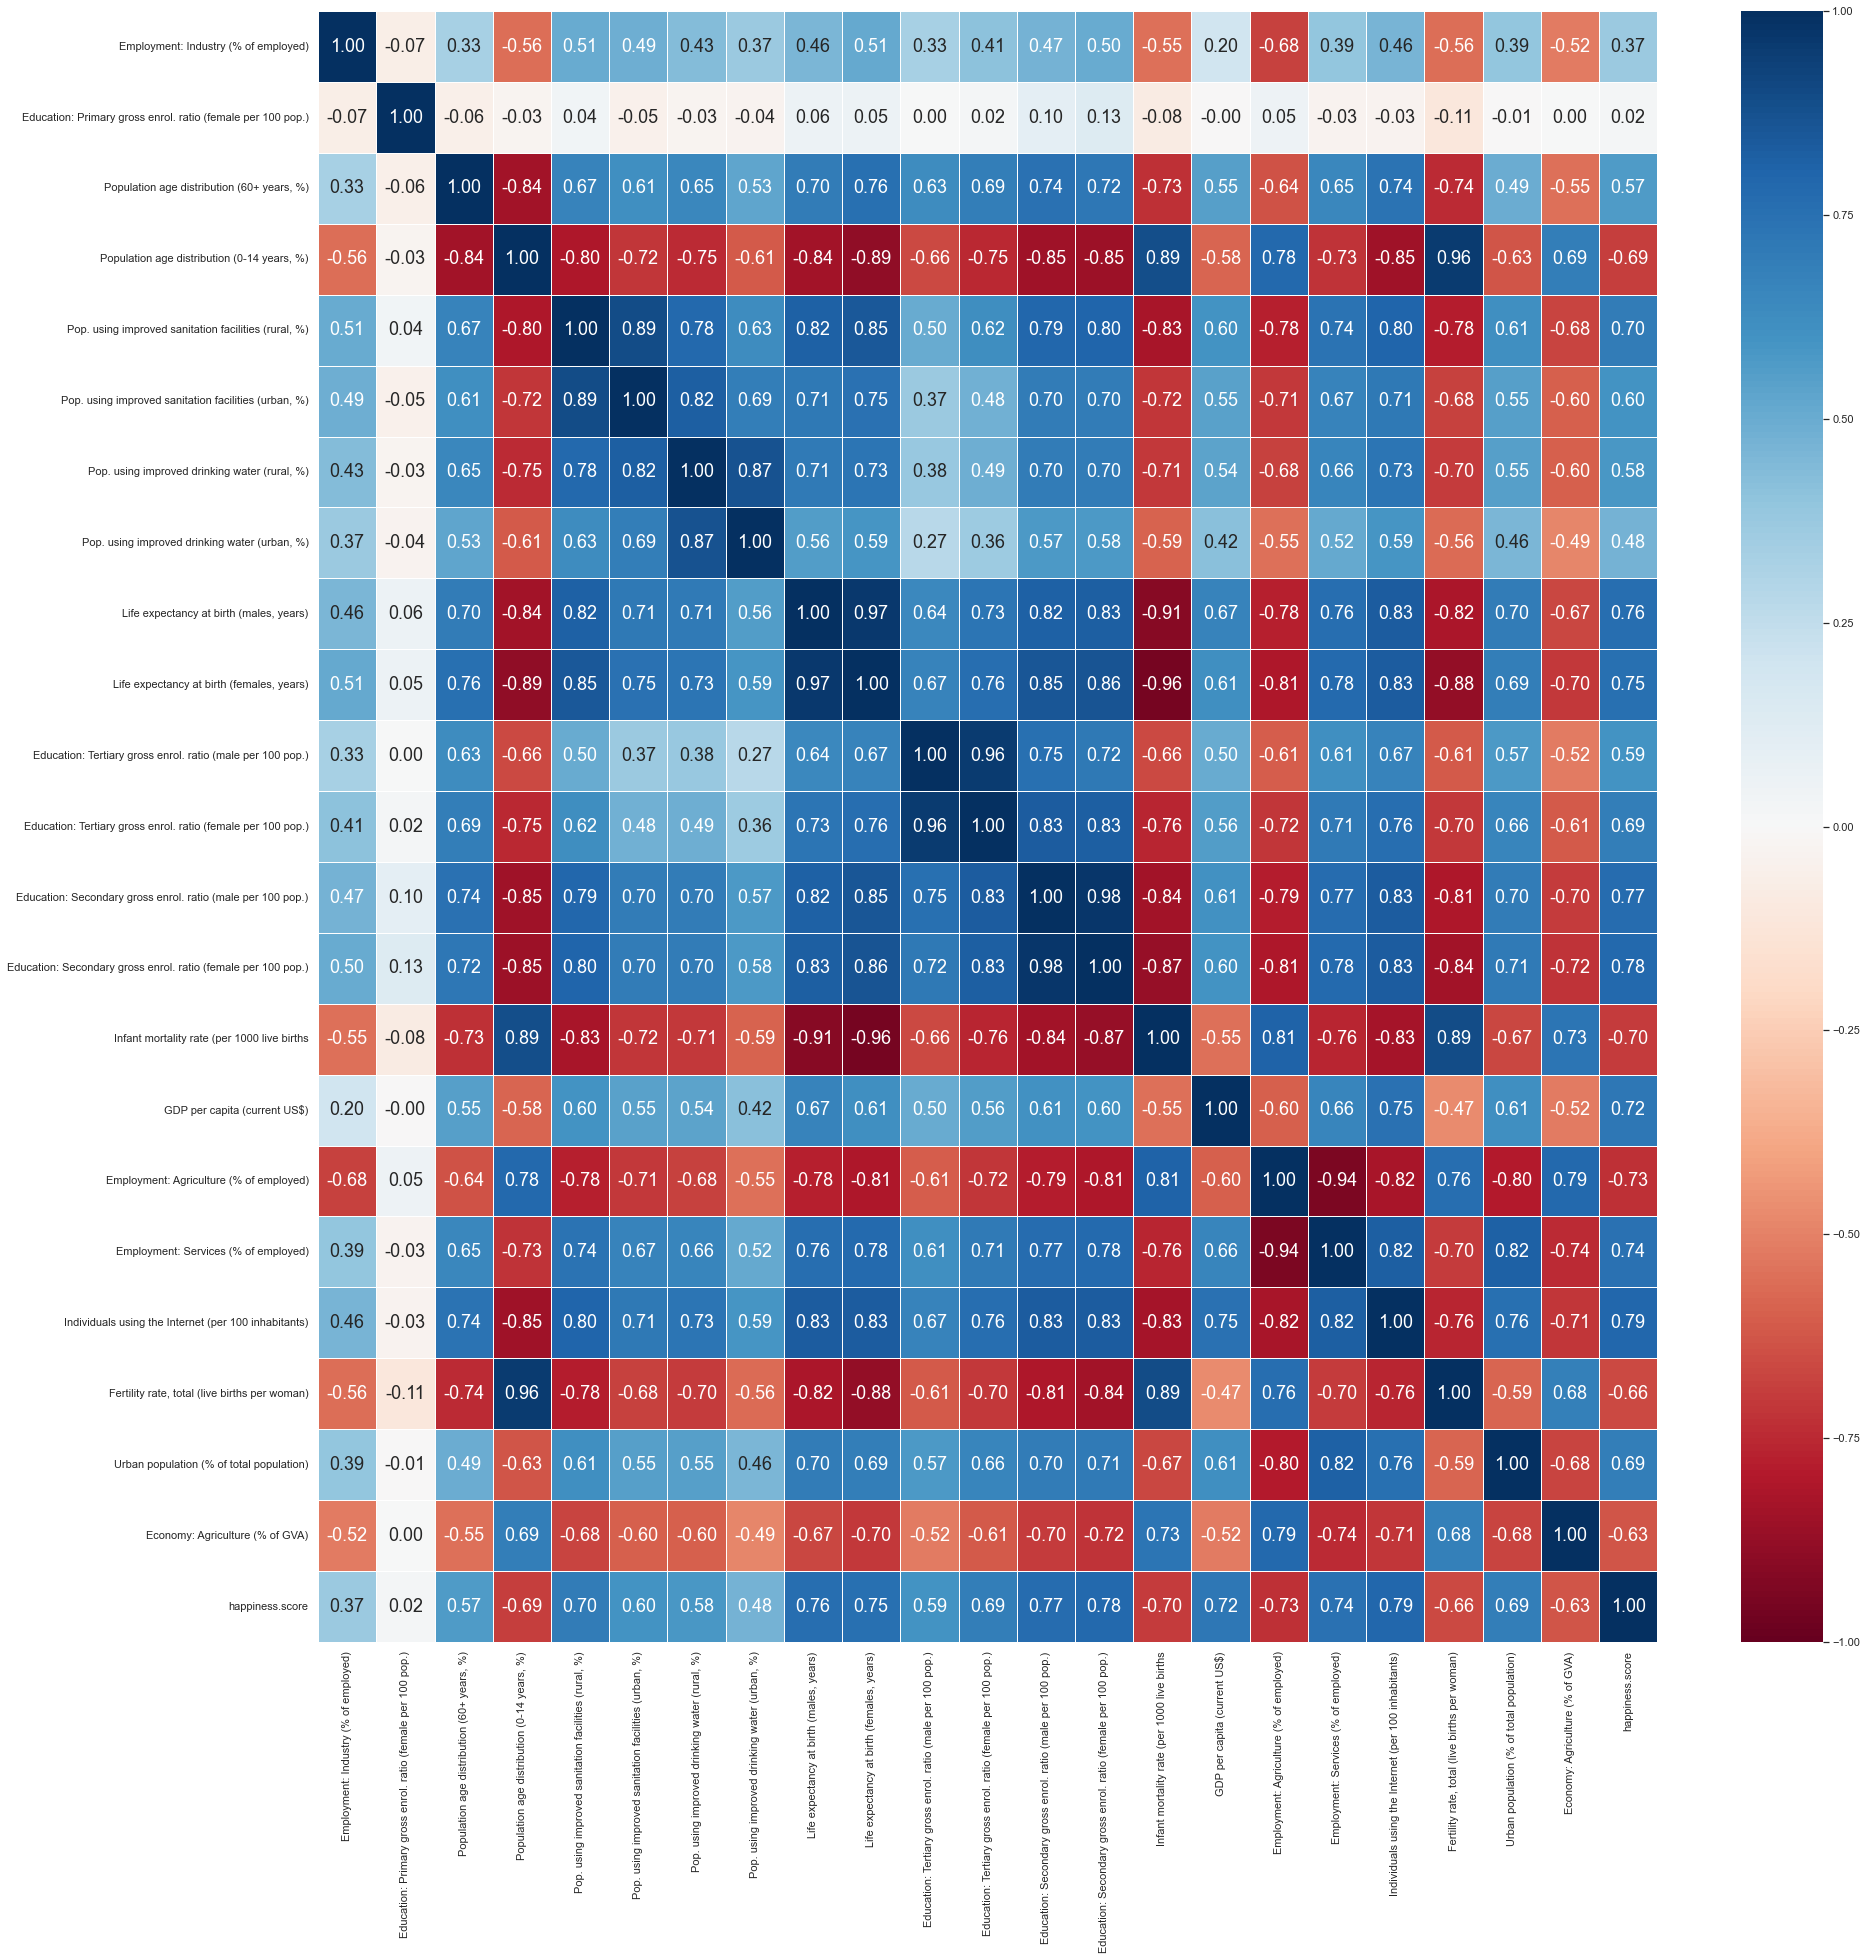

In [4]:
#Find variables most related to happiness
f = plt.figure(figsize=(30, 30))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [5]:
#Picked 2 variable with highest correleation to happiness.score for clustering
ml = pd.DataFrame(data[['Individuals using the Internet (per 100 inhabitants)', 'Education: Secondary gross enrol. ratio (female per 100 pop.)']])

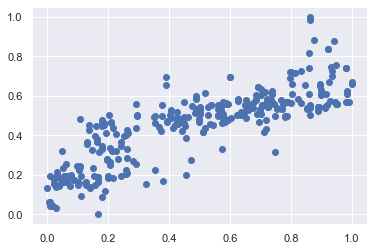

In [6]:
plt.scatter(data['Individuals using the Internet (per 100 inhabitants)'], data['Education: Secondary gross enrol. ratio (female per 100 pop.)'] )

### Finding K

In [7]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(ml)
    kmeanModel.fit(ml)
 
    distortions.append(sum(np.min(cdist(ml, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / ml.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(ml, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / ml.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\tengs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tengs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [8]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.31104468781242134
2 : 0.16550125542016725
3 : 0.1248403058254286
4 : 0.10784020942308756
5 : 0.08810983682811442
6 : 0.08135795837833547
7 : 0.07471796700191416
8 : 0.06843242728359783
9 : 0.06588198557429416


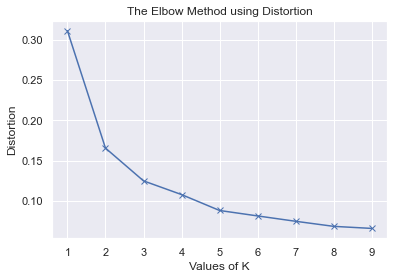

In [9]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [10]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 36.88954363208171
2 : 10.607402998924783
3 : 5.843817920945236
4 : 4.357692226699481
5 : 3.1194156466689873
6 : 2.6031405007147894
7 : 2.1729285276813193
8 : 1.8421978666608496
9 : 1.6974760362089754


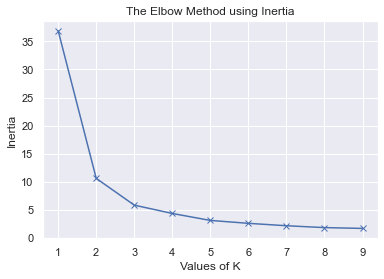

In [11]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

##### One can see that in both the inertia distortion graph and the distortion graph, the point where the graph starts to turn linear would be a K == 5.
###### Therefore, using the elbow method our K value would be 5 this time round

### Happiness conversion

In [12]:
#Splits up happiness score based on k groups to test for cluster
og = list()
for score in data['happiness.score']:
    if score <= 0.20:
        og.append(0)
    elif score <= 0.4:
        og.append(1)
    elif score <= 0.6:
        og.append(2)
    elif score <= 0.8:
        og.append(3)
    else:
        og.append(4)
data['cluster'] = pd.Series(og)
data.head()

,Employment: Industry (% of employed),Education: Primary gross enrol. ratio (female per 100 pop.),"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)","Pop. using improved drinking water (urban, %)","Life expectancy at birth (males, years)","Life expectancy at birth (females, years)",...,Infant mortality rate (per 1000 live births,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA),happiness.score,cluster
0,0.293333,0.317328,0.069620,0.864103,0.173926,0.255139,0.196771,0.231818,0.443503,0.365922,...,0.612565,0.003927,0.510893,0.358881,0.067427,0.677419,0.179039,0.385593,0.180221,0
1,0.323810,0.565762,0.509494,0.192308,0.486097,0.379121,0.584971,0.834091,0.847458,0.818436,...,0.079581,0.037294,0.448802,0.409976,0.637967,0.080645,0.534934,0.317797,0.463016,2
2,0.560000,0.625261,0.224684,0.448718,0.208033,0.087912,0.655903,0.767045,0.824859,0.726257,...,0.243979,0.039643,0.110022,0.637470,0.377593,0.290323,0.681223,0.170904,0.595014,2
3,0.133333,0.551148,0.056962,0.920513,0.154601,0.242986,0.364397,0.622861,0.282486,0.273743,...,0.802094,0.039535,0.549020,0.419708,0.109959,0.774194,0.600437,0.128531,0.273805,1
4,0.420952,0.606472,0.414557,0.358974,0.649785,0.414286,0.772600,0.901805,0.762712,0.790503,...,0.109948,0.145723,0.001089,0.849148,0.686722,0.177419,0.907205,0.086158,0.793012,3


### Plotting

In [13]:
km = KMeans(n_clusters = 5)
predict = km.fit_predict(ml)
ml['group'] = predict
center = km.cluster_centers_
print(center)

[[0.47705369 0.49798525]
 [0.09091708 0.16675223]
 [0.89958136 0.65368672]
 [0.22294925 0.35823035]
 [0.69986685 0.54944841]]


In [14]:
#Whole block used to rearrange clusters so that it will always be group 0 being lowest tier
iter = [0,1,2,3,4]
newgroup = list()
newcluster = list()
for i in iter:
    if center[i][0] <= 0.20:
        newgroup.append(0)
    elif center[i][0] <= 0.4:
        newgroup.append(1)
    elif center[i][0] <= 0.6:
        newgroup.append(2)
    elif center[i][0] <= 0.8:
        newgroup.append(3)
    else:
        newgroup.append(4)
print(newgroup)
for cluster in ml['group']:
    newcluster.append(newgroup[cluster])
ml['new'] = pd.Series(newcluster)
ml.head()

[2, 0, 4, 1, 3]


,Individuals using the Internet (per 100 inhabitants),Education: Secondary gross enrol. ratio (female per 100 pop.),group,new
0,0.067427,0.176505,1,0
1,0.637967,0.517241,4,3
2,0.377593,0.496923,0,2
3,0.109959,0.196789,1,0
4,0.686722,0.605494,4,3


In [15]:
ml1 =  ml[ml.new == 4]
ml2 =  ml[ml.new == 3]
ml3 =  ml[ml.new == 2]
ml4 =  ml[ml.new == 1]
ml5 =  ml[ml.new == 0]

Text(0, 0.5, 'Secondary Education ratio (female per 100 pop.)')

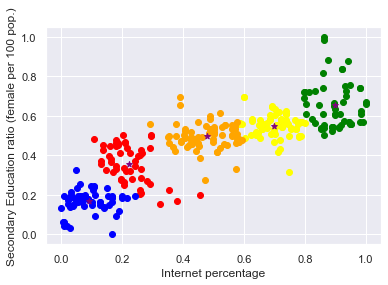

In [16]:
plt.scatter(ml1['Individuals using the Internet (per 100 inhabitants)'], ml1['Education: Secondary gross enrol. ratio (female per 100 pop.)'], color ='green')
plt.scatter(ml2['Individuals using the Internet (per 100 inhabitants)'], ml2['Education: Secondary gross enrol. ratio (female per 100 pop.)'], color ='yellow')
plt.scatter(ml3['Individuals using the Internet (per 100 inhabitants)'], ml3['Education: Secondary gross enrol. ratio (female per 100 pop.)'], color ='orange')
plt.scatter(ml4['Individuals using the Internet (per 100 inhabitants)'], ml4['Education: Secondary gross enrol. ratio (female per 100 pop.)'], color ='red')
plt.scatter(ml5['Individuals using the Internet (per 100 inhabitants)'], ml5['Education: Secondary gross enrol. ratio (female per 100 pop.)'], color ='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = 'purple', marker='*', label= 'centroid')
plt.xlabel('Internet percentage')
plt.ylabel('Secondary Education ratio (female per 100 pop.)')

### Error checking

In [17]:
ml['cluster'] = pd.Series(og)

In [18]:
ml.head()

,Individuals using the Internet (per 100 inhabitants),Education: Secondary gross enrol. ratio (female per 100 pop.),group,new,cluster
0,0.067427,0.176505,1,0,0
1,0.637967,0.517241,4,3,2
2,0.377593,0.496923,0,2,2
3,0.109959,0.196789,1,0,1
4,0.686722,0.605494,4,3,3


In [19]:
wrong = 0
for index, row in ml.iterrows():
    if row['new'] != row['cluster']:
        wrong += 1
print("Total rightly predicted:" + str(len(ml)-wrong) + " out of " + str(len(ml)))
print("Total accuracy is:" + str((len(ml)-wrong)/len(ml)*100))

Total rightly predicted:147 out of 302
Total accuracy is:48.675496688741724
